In [1]:
import pandas as pd
import os
import sys
import matplotlib.pyplot as plt

In [2]:
dataset_name = "google_ds_trends"

In [14]:
input_fname = "google_trends_data.csv"
input_fname = "google_trends.csv"
output_dir = f'./../../processed/{dataset_name}/'
outp_fname = os.path.join(output_dir, f'{dataset_name}.csv')
outp_fig_fname = os.path.join(output_dir, f'{dataset_name}.png')

# Read Data

In [16]:
data = pd.read_csv(input_fname, parse_dates=['Date'])
data.head()

,Date,Artificial intelligence,Autoencoder,Explainable Artificial Intelligence,TensorFlow,Apache Spark,PyTorch,Transfer learning,Support vector machine,MXNet,...,Regression analysis,Regularization,Genetic algorithm,k-nearest neighbors algorithm,Backpropagation,Transformer,Artificial neural network,Apache Hadoop,Dimensionality reduction,Boltzmann machine
0,2017-01-01,55.0,44.0,35.0,21.0,23.0,8.0,0.0,42.0,27.0,...,29.0,37.0,44.0,26.0,25.0,52.0,39.0,23.0,49.0,27.0
1,2017-01-02,61.0,17.0,0.0,29.0,42.0,0.0,40.0,52.0,36.0,...,45.0,29.0,59.0,45.0,47.0,66.0,61.0,45.0,43.0,45.0
2,2017-01-03,62.0,58.0,0.0,41.0,61.0,0.0,21.0,55.0,29.0,...,52.0,30.0,62.0,40.0,28.0,73.0,66.0,71.0,13.0,16.0
3,2017-01-04,67.0,43.0,0.0,44.0,64.0,0.0,0.0,56.0,41.0,...,55.0,33.0,64.0,39.0,46.0,77.0,67.0,75.0,46.0,62.0
4,2017-01-05,76.0,30.0,0.0,42.0,65.0,8.0,35.0,53.0,30.0,...,59.0,32.0,49.0,51.0,32.0,80.0,72.0,70.0,51.0,0.0


# Prepare Data

## Unpivot Trends Columns

In [5]:
# Unpivot the data while keeping the 'Date' column intact
data = data.melt(id_vars=['Date'], var_name='Topic', value_name='Trend')

# Display the first few rows of the unpivoted dataframe
data.head()

,Date,Topic,Trend
0,2017-01-01,Logistic Regression,23
1,2017-01-02,Logistic Regression,34
2,2017-01-03,Logistic Regression,49
3,2017-01-04,Logistic Regression,49
4,2017-01-05,Logistic Regression,54


In [6]:
data['Topic'].nunique()

56

In [7]:
series_col = "Topic"
epoch_col = 'Epoch'
epoch_label = "Date"
time_col = 'Date'
value_col = 'Trend'
exog_cols = []

## Add Series Id

In [8]:
if series_col not in data:
    data.insert(0, "SeriesId", 1)
data.head()

,Date,Topic,Trend
0,2017-01-01,Logistic Regression,23
1,2017-01-02,Logistic Regression,34
2,2017-01-03,Logistic Regression,49
3,2017-01-04,Logistic Regression,49
4,2017-01-05,Logistic Regression,54


## Add Epochs

In [9]:
if epoch_col not in data: 
    unique_times = sorted(data[time_col].drop_duplicates().tolist())
    times_to_epoch = {
        t: i for i, t in enumerate(unique_times)
    }
    #print(yrmt_to_epoch)
    data.insert(1, epoch_col, data[time_col].map(times_to_epoch))
data.head()

,Date,Epoch,Topic,Trend
0,2017-01-01,0,Logistic Regression,23
1,2017-01-02,1,Logistic Regression,34
2,2017-01-03,2,Logistic Regression,49
3,2017-01-04,3,Logistic Regression,49
4,2017-01-05,4,Logistic Regression,54


# Visualize Data

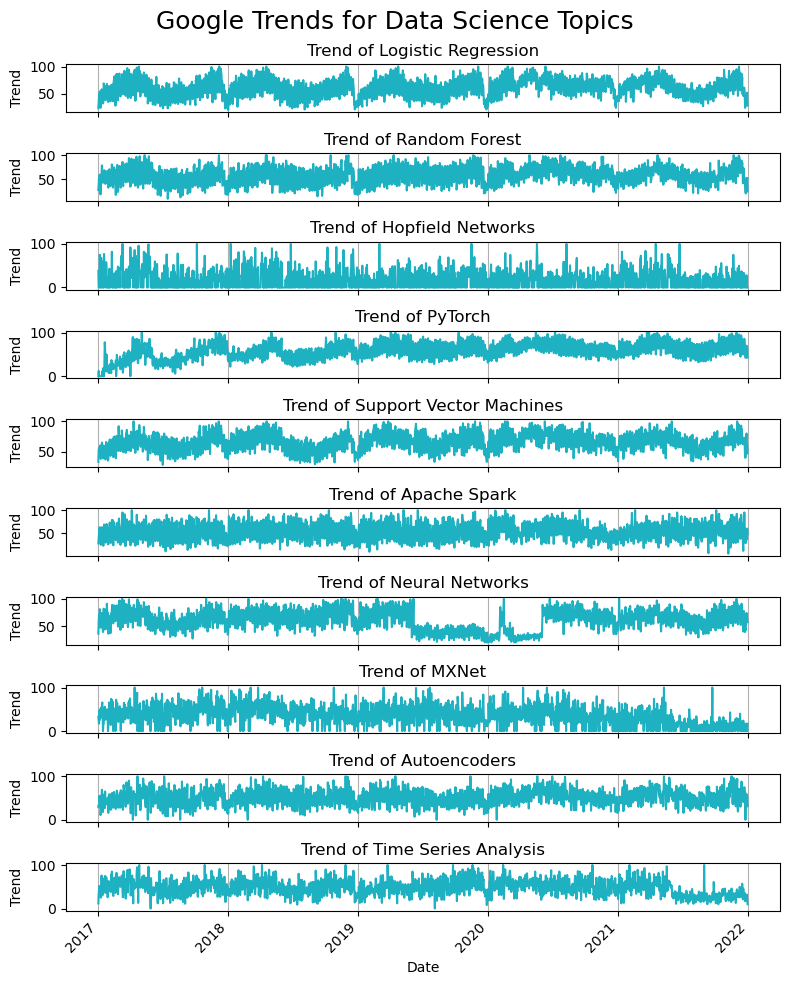

In [10]:
import matplotlib.pyplot as plt

def plot_trends(df, num_topics=10, filepath=outp_fig_fname):
    """
    This function takes a dataframe of unpivoted Google Trends data and a number of topics to chart.
    It creates a n x 1 subplot (with n being the number of topics, at most 10) and plots those topics' trends.
    
    Parameters:
    df (DataFrame): The unpivoted dataframe with 'Date', 'Topic', and 'Trend' columns.
    num_topics (int): The number of topics to plot, defaulted to 10.
    """
    
    # Get the unique topics from the dataframe
    unique_topics = df['Topic'].unique()
    
    # Limit the number of topics to plot
    topics_to_plot = unique_topics[:min(len(unique_topics), num_topics)]
    
    # Set up the subplots
    fig, axes = plt.subplots(nrows=min(num_topics, len(topics_to_plot)), ncols=1, figsize=(8, num_topics*1))
    
    # If there's only one topic to plot, axes will not be an array, so we wrap it in a list
    if num_topics == 1:
        axes = [axes]
    
    # Define the color for the plots
    plot_color = '#1db1c1'
    
    # Plot each topic on a separate subplot
    for i, (ax, topic) in enumerate(zip(axes, topics_to_plot)):
        # Filter the dataframe for the current topic
        topic_data = df[df['Topic'] == topic]
                
        # Plot the data
        ax.plot(topic_data['Date'], topic_data['Trend'], color=plot_color)
        
        # Set the title and labels
        ax.set_title(f"Trend of {topic}")
        ax.set_ylabel('Trend')
        # Show x-axis grid
        ax.xaxis.grid(True)
        
        # Show x-axis labels only for the last (bottom) plot
        if i < len(topics_to_plot) - 1:
            ax.set_xticklabels([])
        else:
            # Rotate date labels to avoid overlap
            plt.setp(ax.xaxis.get_majorticklabels(), rotation=45, ha='right')
            ax.set_xlabel('Date')            
        
        # Rotate date labels to avoid overlap
        plt.setp(ax.xaxis.get_majorticklabels(), rotation=45, ha='right')
    
    plt.suptitle("Google Trends for Data Science Topics", fontsize=18)
    # Adjust layout to prevent overlap
    plt.tight_layout()
    # Save figure
    plt.savefig(filepath)
    
    plt.show()

# Test the function with the unpivoted data
plot_trends(data, num_topics=10, filepath=outp_fig_fname)  # Let's plot 5 topics for demonstration purposes


# Save Main Data File

In [11]:
all_cols = [series_col, epoch_col, value_col] + exog_cols

In [12]:
data[all_cols].to_csv(outp_fname, index=False)